# Analyze top3 data
I have a couple specific questions I'd like to answer w/ top3 data:
- What's up with tRNA ligases?
- Can I discern the effect of adding 0815 by looking at strains with and without it (ex - comparing strain A-B-C-0815 with strain A-B-C)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/full_top3_data/top3_processed.csv')
df

,line_name_rep_cycle,KRT1,KRT10,KRT9,MM_1762,PP_0001,PP_0004,PP_0006,PP_0010,PP_0011,...,PP_5413,PP_5414,PP_5415,PP_5416,PP_5417,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
0,Control-R10_c0,-2.736489,0.000000,0.000000,0.007230,-1.702623,-1.830991,-1.328508,-1.558112,-1.010053,...,-0.250491,-1.047622,-0.505048,-1.197525,-0.909161,-1.288999,0.405407,-0.432731,0.522132,1.024392
1,Control-R11_c0,-2.253437,-3.543266,-3.084122,0.028310,-1.692394,-1.841398,-1.344926,-1.588287,-0.979808,...,-0.204258,-1.025308,-0.475521,-1.160076,-0.856851,-1.340504,0.455259,-0.377863,0.514986,1.120367
2,Control-R12_c0,0.000000,0.000000,0.000000,0.042080,-1.640501,-1.809280,-1.320289,-1.649605,-0.972699,...,-0.235241,-1.001357,-0.476665,-1.179270,-0.909050,-1.357045,0.424521,-0.520256,0.559150,1.178920
3,Control-R13_c0,-2.006977,-2.984257,-3.577689,-0.015665,-1.680365,-1.864548,-1.312061,-1.594387,-0.996562,...,-0.213866,-1.020359,-0.473025,-1.109567,-0.858687,-1.411181,0.417114,-0.516092,0.453634,0.720284
4,Control-R14_c0,-3.334098,-3.518762,-3.518762,-0.014848,-1.650709,-1.846582,-1.318577,-1.609326,-1.001895,...,-0.214927,-0.974098,-0.470553,-1.109419,-0.890327,-1.402907,0.412923,-0.466954,0.506964,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,PP_5419-R2_c0,-3.370824,-3.370824,-3.370824,0.050842,-1.673511,-2.065708,-1.419010,-1.721185,-0.921180,...,-0.379905,-1.109808,-0.478091,-1.217316,-0.823736,-3.148976,0.521472,-0.326725,0.592761,2.153361
1496,PP_5419-R3_c0,-3.374921,-3.374921,-3.374921,0.048253,-1.686083,-1.906116,-1.425076,-1.714134,-0.976799,...,-0.383756,-1.122637,-0.535937,-1.253465,-0.901043,-3.153072,0.456293,-0.393974,0.623294,2.397354
1497,PP_5420-R1_c0,-3.455502,-3.358592,-3.580441,0.123275,-1.625546,-2.210190,-1.728035,-1.719898,-1.287797,...,-0.345770,-0.913597,-0.368391,-1.090943,-0.778143,-3.455502,0.492308,-0.523098,0.788959,0.484521
1498,PP_5420-R2_c0,-2.727384,-3.236320,-3.067834,0.207627,-1.654087,-2.279164,-1.739094,-1.864161,-1.240000,...,-0.290291,-0.930629,-0.343305,-1.017702,-0.726611,-3.333230,0.550126,-0.757640,0.837083,0.527125


In [3]:
trna_ligase_proteins = [
    "PP_4474",
    "PP_4000",
    "PP_2905",
    "PP_2470",
    "PP_2469",
    "PP_2465",
    "PP_1977",
    "PP_1496",
    "PP_1311",
    "PP_1097",
    "PP_0977",
    "PP_0603",
    "PP_0436",
    "PP_5089",
    "PP_4794",
    "PP_2904",
    "PP_1205",
    "PP_0854",
    "PP_0061",
    "PP_0060"
]
trna_ligase_names = [
    "alaS",
    "serS",
    "cysS",
    "pheT",
    "pheS",
    "thrS",
    "gltX",
    "lysS",
    "trpS",
    "metG",
    "valS",
    "ileS",
    "tyrS",
    "argS",
    "leuS",
    "glnS",
    "proS",
    "hisS",
    "glyQ",
    "glyS"
]
protein_to_name_dict = dict(zip(trna_ligase_proteins, trna_ligase_names))
name_to_protein_dict = dict(zip(trna_ligase_names, trna_ligase_proteins))

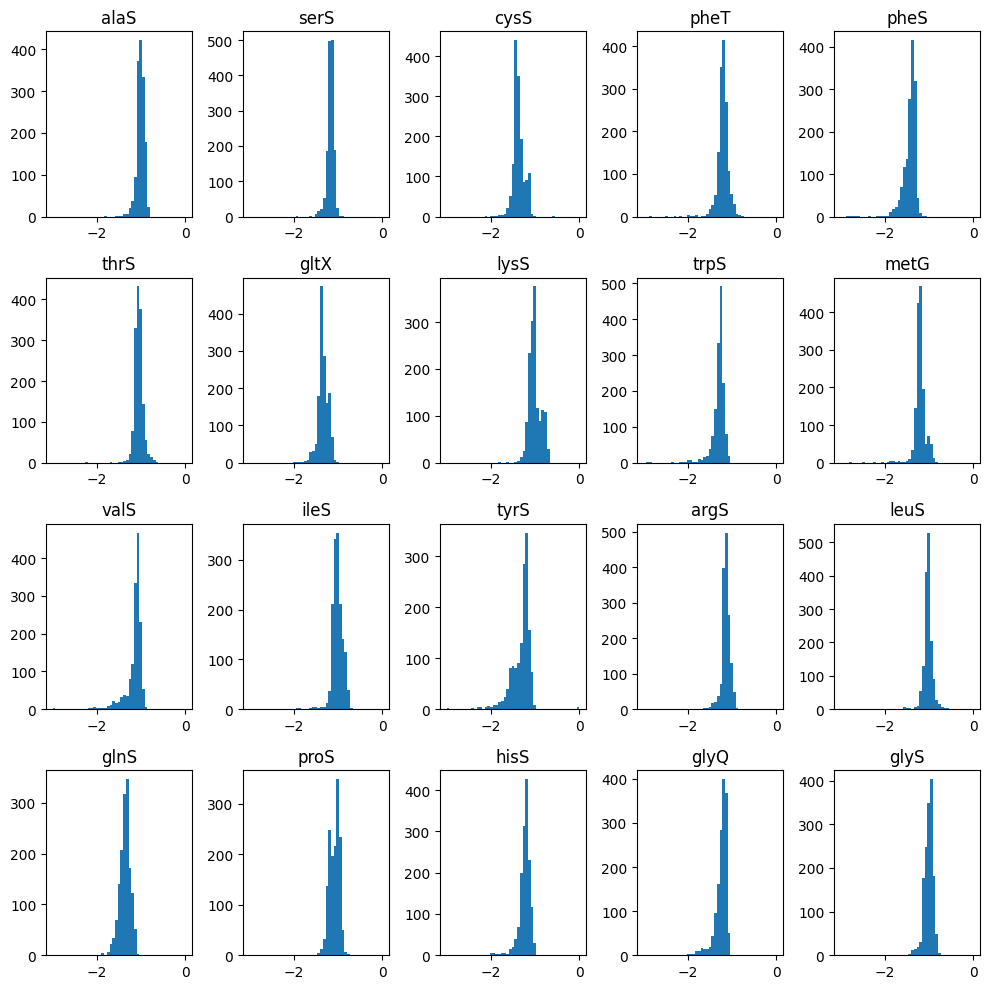

In [4]:
bins = np.linspace(-3, 0, 50)
# logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))
fig, ax = plt.subplots(4, 5, figsize = (10,10))
for i, (a, p, n) in enumerate(zip(fig.get_axes(), trna_ligase_proteins, trna_ligase_names)):
    a.hist(df[p], bins = bins)
    a.set_title(n)
    # a.set_xscale('log')
fig.tight_layout()

In [5]:
df_trna = df[trna_ligase_proteins].melt()
df_trna = df_trna.rename(columns={'variable':'pp', 'value': 'log10_abundance'})
df_trna['name'] = df_trna['pp'].apply(lambda x: protein_to_name_dict[x])
df_trna['plot_name'] = df_trna.apply(lambda x: f"{x['name']}/{x['pp']}", axis = 1)
df_trna

,pp,log10_abundance,name,plot_name
0,PP_4474,-1.032542,alaS,alaS/PP_4474
1,PP_4474,-1.059145,alaS,alaS/PP_4474
2,PP_4474,-1.043969,alaS,alaS/PP_4474
3,PP_4474,-1.060448,alaS,alaS/PP_4474
4,PP_4474,-1.025424,alaS,alaS/PP_4474
...,...,...,...,...
29995,PP_0060,-1.056022,glyS,glyS/PP_0060
29996,PP_0060,-1.030289,glyS,glyS/PP_0060
29997,PP_0060,-1.141654,glyS,glyS/PP_0060
29998,PP_0060,-1.198289,glyS,glyS/PP_0060


<Axes: xlabel='log10_abundance', ylabel='plot_name'>

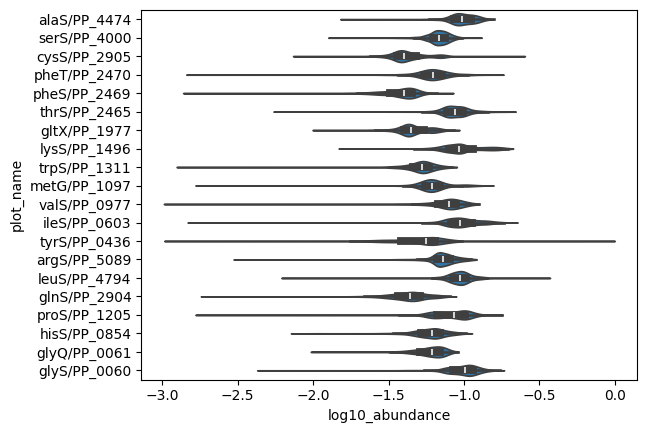

In [6]:
sns.violinplot(data = df_trna[df_trna['log10_abundance']>-3], y = 'plot_name', x = 'log10_abundance', cut = 0)

In [7]:
var_list = []
for t in trna_ligase_proteins:
    vals = df.loc[df[t]>-3, t].values
    var_list.append(np.var(vals))
var_order = [name for _, name in sorted(zip(var_list, trna_ligase_proteins))]
var_order_plot_name = [f'{protein_to_name_dict[x]}/{x}' for x in var_order]
var_order

['PP_4000',
 'PP_4474',
 'PP_5089',
 'PP_2465',
 'PP_4794',
 'PP_0060',
 'PP_1977',
 'PP_2905',
 'PP_2904',
 'PP_1205',
 'PP_1496',
 'PP_2470',
 'PP_1097',
 'PP_0854',
 'PP_0061',
 'PP_0603',
 'PP_1311',
 'PP_2469',
 'PP_0977',
 'PP_0436']

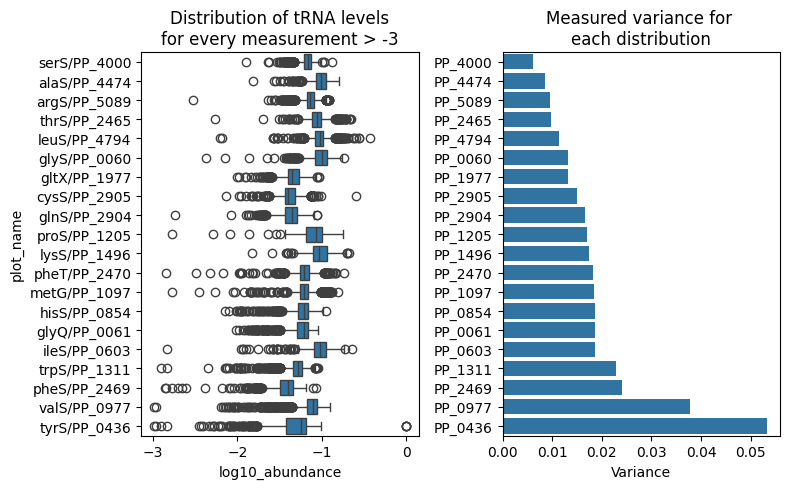

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (8, 5))

sns.boxplot(
    data = df_trna[df_trna['log10_abundance']>-3],
    y = 'plot_name',
    x = 'log10_abundance',
    order=var_order_plot_name, 
    ax = ax[0]
)
ax[0].set_title('Distribution of tRNA levels\nfor every measurement > -3')

sns.barplot(x = var_list, y = trna_ligase_proteins, order = var_order, ax = ax[1])
ax[1].set_xlabel('Variance')
ax[1].set_title('Measured variance for \neach distribution')
fig.tight_layout()

In [29]:
df['has_0815'] = df['line_name_rep_cycle'].str.contains('PP_0815')

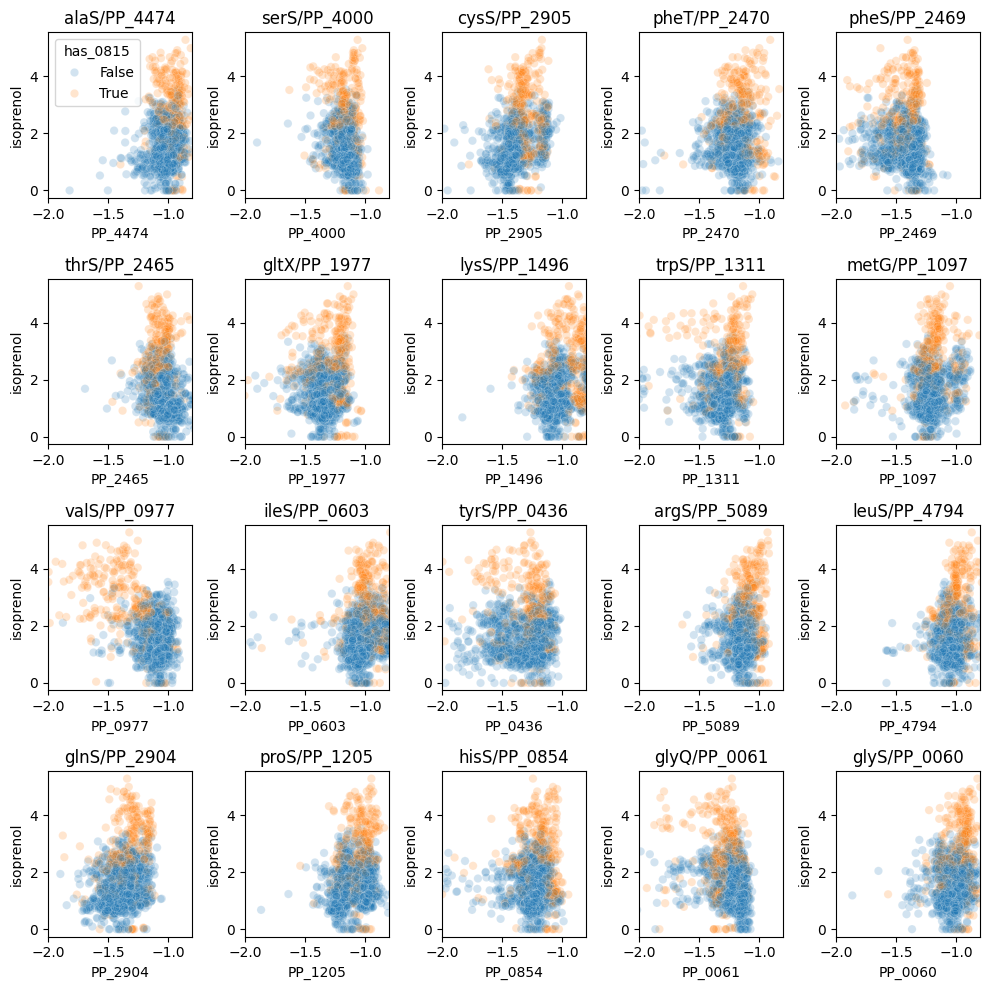

In [27]:
fig, ax = plt.subplots(4, 5, figsize = (10,10))
for i, (a, p, n) in enumerate(zip(fig.get_axes(), trna_ligase_proteins, trna_ligase_names)):
    sns.scatterplot(
        df,
        x = p,
        y = 'isoprenol',
        alpha = 0.2,
        ax = a,
        hue = 'has_0815'
    )
    a.set_title(f'{n}/{p}')
    a.set_xlim([-2, -0.8])
    if i>0:
        a.get_legend().remove()
fig.tight_layout()

In [36]:
df_trna = df[trna_ligase_proteins + ['has_0815']].melt(id_vars = 'has_0815')
df_trna = df_trna.rename(columns={'variable':'pp', 'value': 'log10_abundance'})
df_trna['name'] = df_trna['pp'].apply(lambda x: protein_to_name_dict[x])
df_trna['plot_name'] = df_trna.apply(lambda x: f"{x['name']}/{x['pp']}", axis = 1)
df_trna.value_counts('has_0815')

has_0815
False    22440
True      7560
Name: count, dtype: int64

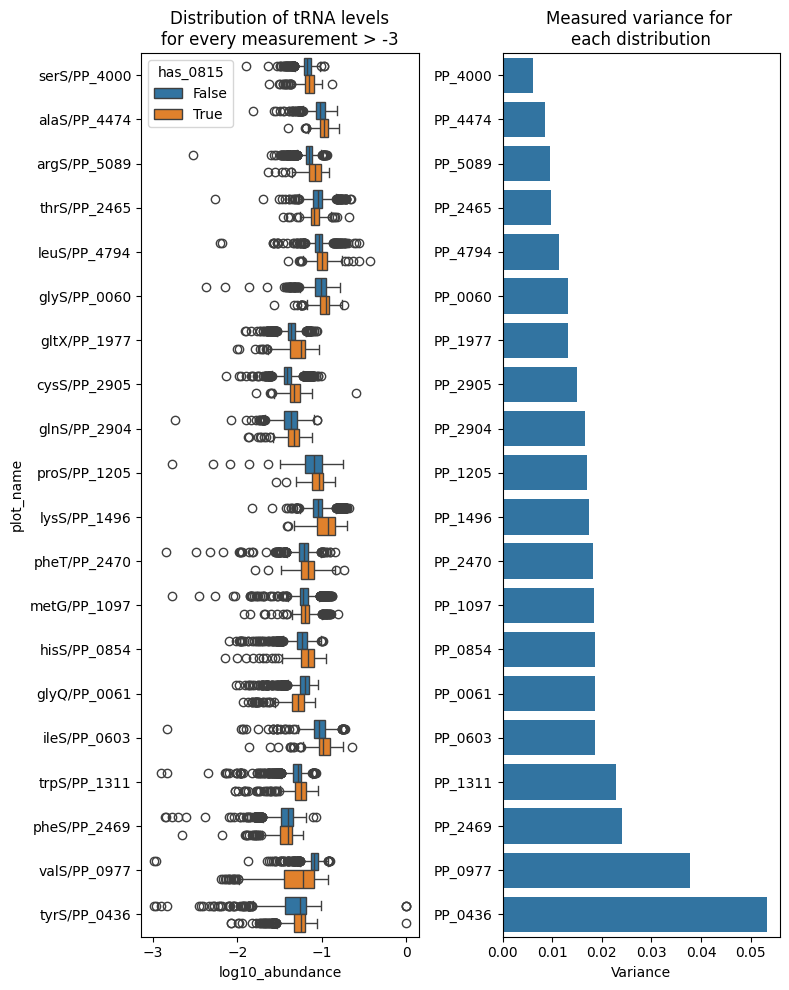

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (8, 10d))

sns.boxplot(
    data = df_trna[df_trna['log10_abundance']>-3],
    y = 'plot_name',
    x = 'log10_abundance',
    order=var_order_plot_name, 
    ax = ax[0],
    hue = 'has_0815'
)
ax[0].set_title('Distribution of tRNA levels\nfor every measurement > -3')

sns.barplot(x = var_list, y = trna_ligase_proteins, order = var_order, ax = ax[1])
ax[1].set_xlabel('Variance')
ax[1].set_title('Measured variance for \neach distribution')
fig.tight_layout()

## Look at effect of adding 0815

In [10]:
'PP_5419-R3_c0'.split('-')

['PP_5419', 'R3_c0']

In [11]:
df2 = df.copy(deep = True)
df2

,line_name_rep_cycle,KRT1,KRT10,KRT9,MM_1762,PP_0001,PP_0004,PP_0006,PP_0010,PP_0011,...,PP_5413,PP_5414,PP_5415,PP_5416,PP_5417,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
0,Control-R10_c0,-2.736489,0.000000,0.000000,0.007230,-1.702623,-1.830991,-1.328508,-1.558112,-1.010053,...,-0.250491,-1.047622,-0.505048,-1.197525,-0.909161,-1.288999,0.405407,-0.432731,0.522132,1.024392
1,Control-R11_c0,-2.253437,-3.543266,-3.084122,0.028310,-1.692394,-1.841398,-1.344926,-1.588287,-0.979808,...,-0.204258,-1.025308,-0.475521,-1.160076,-0.856851,-1.340504,0.455259,-0.377863,0.514986,1.120367
2,Control-R12_c0,0.000000,0.000000,0.000000,0.042080,-1.640501,-1.809280,-1.320289,-1.649605,-0.972699,...,-0.235241,-1.001357,-0.476665,-1.179270,-0.909050,-1.357045,0.424521,-0.520256,0.559150,1.178920
3,Control-R13_c0,-2.006977,-2.984257,-3.577689,-0.015665,-1.680365,-1.864548,-1.312061,-1.594387,-0.996562,...,-0.213866,-1.020359,-0.473025,-1.109567,-0.858687,-1.411181,0.417114,-0.516092,0.453634,0.720284
4,Control-R14_c0,-3.334098,-3.518762,-3.518762,-0.014848,-1.650709,-1.846582,-1.318577,-1.609326,-1.001895,...,-0.214927,-0.974098,-0.470553,-1.109419,-0.890327,-1.402907,0.412923,-0.466954,0.506964,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,PP_5419-R2_c0,-3.370824,-3.370824,-3.370824,0.050842,-1.673511,-2.065708,-1.419010,-1.721185,-0.921180,...,-0.379905,-1.109808,-0.478091,-1.217316,-0.823736,-3.148976,0.521472,-0.326725,0.592761,2.153361
1496,PP_5419-R3_c0,-3.374921,-3.374921,-3.374921,0.048253,-1.686083,-1.906116,-1.425076,-1.714134,-0.976799,...,-0.383756,-1.122637,-0.535937,-1.253465,-0.901043,-3.153072,0.456293,-0.393974,0.623294,2.397354
1497,PP_5420-R1_c0,-3.455502,-3.358592,-3.580441,0.123275,-1.625546,-2.210190,-1.728035,-1.719898,-1.287797,...,-0.345770,-0.913597,-0.368391,-1.090943,-0.778143,-3.455502,0.492308,-0.523098,0.788959,0.484521
1498,PP_5420-R2_c0,-2.727384,-3.236320,-3.067834,0.207627,-1.654087,-2.279164,-1.739094,-1.864161,-1.240000,...,-0.290291,-0.930629,-0.343305,-1.017702,-0.726611,-3.333230,0.550126,-0.757640,0.837083,0.527125


In [12]:
TARGET = '0812'

In [13]:
def get_line_name_cycle(x):
    pp_str = x.split('-')[0]
    cycle = x[-1]
    return f'{pp_str}_c{cycle}'

df2['line_name_cycle'] = df2['line_name_rep_cycle'].apply(lambda x: get_line_name_cycle(x))
df2['cycle'] = df2['line_name_rep_cycle'].apply(lambda x: int(x[-1]))
df2['has_target'] = df2['line_name_rep_cycle'].apply(lambda x: TARGET in x)
df2['number_of_grna'] = df2['line_name_rep_cycle'].apply(lambda x: x.count('PP'))
df2

,line_name_rep_cycle,KRT1,KRT10,KRT9,MM_1762,PP_0001,PP_0004,PP_0006,PP_0010,PP_0011,...,PP_5417,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol,line_name_cycle,cycle,has_target,number_of_grna
0,Control-R10_c0,-2.736489,0.000000,0.000000,0.007230,-1.702623,-1.830991,-1.328508,-1.558112,-1.010053,...,-0.909161,-1.288999,0.405407,-0.432731,0.522132,1.024392,Control_c0,0,False,0
1,Control-R11_c0,-2.253437,-3.543266,-3.084122,0.028310,-1.692394,-1.841398,-1.344926,-1.588287,-0.979808,...,-0.856851,-1.340504,0.455259,-0.377863,0.514986,1.120367,Control_c0,0,False,0
2,Control-R12_c0,0.000000,0.000000,0.000000,0.042080,-1.640501,-1.809280,-1.320289,-1.649605,-0.972699,...,-0.909050,-1.357045,0.424521,-0.520256,0.559150,1.178920,Control_c0,0,False,0
3,Control-R13_c0,-2.006977,-2.984257,-3.577689,-0.015665,-1.680365,-1.864548,-1.312061,-1.594387,-0.996562,...,-0.858687,-1.411181,0.417114,-0.516092,0.453634,0.720284,Control_c0,0,False,0
4,Control-R14_c0,-3.334098,-3.518762,-3.518762,-0.014848,-1.650709,-1.846582,-1.318577,-1.609326,-1.001895,...,-0.890327,-1.402907,0.412923,-0.466954,0.506964,1.030501,Control_c0,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,PP_5419-R2_c0,-3.370824,-3.370824,-3.370824,0.050842,-1.673511,-2.065708,-1.419010,-1.721185,-0.921180,...,-0.823736,-3.148976,0.521472,-0.326725,0.592761,2.153361,PP_5419_c0,0,False,1
1496,PP_5419-R3_c0,-3.374921,-3.374921,-3.374921,0.048253,-1.686083,-1.906116,-1.425076,-1.714134,-0.976799,...,-0.901043,-3.153072,0.456293,-0.393974,0.623294,2.397354,PP_5419_c0,0,False,1
1497,PP_5420-R1_c0,-3.455502,-3.358592,-3.580441,0.123275,-1.625546,-2.210190,-1.728035,-1.719898,-1.287797,...,-0.778143,-3.455502,0.492308,-0.523098,0.788959,0.484521,PP_5420_c0,0,False,1
1498,PP_5420-R2_c0,-2.727384,-3.236320,-3.067834,0.207627,-1.654087,-2.279164,-1.739094,-1.864161,-1.240000,...,-0.726611,-3.333230,0.550126,-0.757640,0.837083,0.527125,PP_5420_c0,0,False,1


In [14]:
filter_df = pd.read_csv('../df_target_all_TEST.csv', index_col = 0)
filter_df['line_name_cycle'] = filter_df.apply(lambda x: f"{x['line_name_norep']}_c{x['cycle']}", axis = 1)
df2['pass_filter'] = df2['line_name_cycle'].apply(
    lambda x: x in filter_df.loc[filter_df['to_keep_improved'], 'line_name_cycle'].values
)
df2

,line_name_rep_cycle,KRT1,KRT10,KRT9,MM_1762,PP_0001,PP_0004,PP_0006,PP_0010,PP_0011,...,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol,line_name_cycle,cycle,has_target,number_of_grna,pass_filter
0,Control-R10_c0,-2.736489,0.000000,0.000000,0.007230,-1.702623,-1.830991,-1.328508,-1.558112,-1.010053,...,-1.288999,0.405407,-0.432731,0.522132,1.024392,Control_c0,0,False,0,True
1,Control-R11_c0,-2.253437,-3.543266,-3.084122,0.028310,-1.692394,-1.841398,-1.344926,-1.588287,-0.979808,...,-1.340504,0.455259,-0.377863,0.514986,1.120367,Control_c0,0,False,0,True
2,Control-R12_c0,0.000000,0.000000,0.000000,0.042080,-1.640501,-1.809280,-1.320289,-1.649605,-0.972699,...,-1.357045,0.424521,-0.520256,0.559150,1.178920,Control_c0,0,False,0,True
3,Control-R13_c0,-2.006977,-2.984257,-3.577689,-0.015665,-1.680365,-1.864548,-1.312061,-1.594387,-0.996562,...,-1.411181,0.417114,-0.516092,0.453634,0.720284,Control_c0,0,False,0,True
4,Control-R14_c0,-3.334098,-3.518762,-3.518762,-0.014848,-1.650709,-1.846582,-1.318577,-1.609326,-1.001895,...,-1.402907,0.412923,-0.466954,0.506964,1.030501,Control_c0,0,False,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,PP_5419-R2_c0,-3.370824,-3.370824,-3.370824,0.050842,-1.673511,-2.065708,-1.419010,-1.721185,-0.921180,...,-3.148976,0.521472,-0.326725,0.592761,2.153361,PP_5419_c0,0,False,1,False
1496,PP_5419-R3_c0,-3.374921,-3.374921,-3.374921,0.048253,-1.686083,-1.906116,-1.425076,-1.714134,-0.976799,...,-3.153072,0.456293,-0.393974,0.623294,2.397354,PP_5419_c0,0,False,1,False
1497,PP_5420-R1_c0,-3.455502,-3.358592,-3.580441,0.123275,-1.625546,-2.210190,-1.728035,-1.719898,-1.287797,...,-3.455502,0.492308,-0.523098,0.788959,0.484521,PP_5420_c0,0,False,1,False
1498,PP_5420-R2_c0,-2.727384,-3.236320,-3.067834,0.207627,-1.654087,-2.279164,-1.739094,-1.864161,-1.240000,...,-3.333230,0.550126,-0.757640,0.837083,0.527125,PP_5420_c0,0,False,1,False


In [15]:
strains_with_target =  df2.loc[df2['has_target'], 'line_name_cycle'].unique()

In [16]:
parent_child_list = []

for s in strains_with_target:
    print(f'strain: {s}')
    non_cycle_string = s[:-2]
    #get individual genes as strings
    grna = non_cycle_string.split('PP_')[1:]
    # print(f'1) grna: {grna}')
    #remove the underscore
    grna = [g[:-1] for g in grna]
    grna.remove(TARGET)
    # print(f'2) grna: {grna}')
    # print(f'len: {len(grna)}')

    #check to see if there's more than one gRNA (i.e. exclude the PP_0815 only strain)
    if len(grna)>0:
        #Look for any other strains with that collection of grna
        parent_strain_idx = df2['line_name_rep_cycle'].str.contains(grna[0])
        # print(sum(parent_strain_idx))
        for i in range(1,len(grna)):
            parent_strain_idx = parent_strain_idx & df2['line_name_rep_cycle'].str.contains(grna[i])
            # print(sum(parent_strain_idx))
        parent_strain_idx = parent_strain_idx & (df2['number_of_grna'] == len(grna)) & (df2['cycle'] != 2)
        # print(sum(parent_strain_idx))
        # print(len(df[parent_strain_idx]))
        
    
        if len(df2[parent_strain_idx])>0:
            print(f'~~~~~~~~~~~~~~~~~~~~~~~~~ strain: {s} Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~')
            strain_list = [s]
            strain_list.extend([strain_name for strain_name in df2.loc[parent_strain_idx, 'line_name_cycle'].unique()])
            parent_child_list.append(strain_list)
    
pair_list = [l for l in parent_child_list if len(l) == 2]    
    
    


strain: PP_0368_PP_0437_PP_0812_c4
~~~~~~~~~~~~~~~~~~~~~~~~~ strain: PP_0368_PP_0437_PP_0812_c4 Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~
strain: PP_0368_PP_0528_PP_0812_c5
~~~~~~~~~~~~~~~~~~~~~~~~~ strain: PP_0368_PP_0528_PP_0812_c5 Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~
strain: PP_0368_PP_0751_PP_0812_c5
~~~~~~~~~~~~~~~~~~~~~~~~~ strain: PP_0368_PP_0751_PP_0812_c5 Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~
strain: PP_0368_PP_0751_PP_0812_PP_0815_c5
~~~~~~~~~~~~~~~~~~~~~~~~~ strain: PP_0368_PP_0751_PP_0812_PP_0815_c5 Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~
strain: PP_0368_PP_0812_c2
~~~~~~~~~~~~~~~~~~~~~~~~~ strain: PP_0368_PP_0812_c2 Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~
strain: PP_0368_PP_0812_c3
~~~~~~~~~~~~~~~~~~~~~~~~~ strain: PP_0368_PP_0812_c3 Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~
strain: PP_0368_PP_0812_PP_0813_c4
~~~~~~~~~~~~~~~~~~~~~~~~~ strain: PP_0368_PP_0812_PP_0813_c4 Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~
strain: PP_0368_PP_0812_PP_0813_PP_0815_c5
~~~~~~~~~~~~~~~~~~~~~~~~~ strain: PP_0368_

In [17]:
df_list = []
for l in pair_list:
    parent_strain = l[1]
    child_strain = l[0]
    parent_df = df2.loc[
        df2['line_name_cycle'] == parent_strain,
        ['line_name_rep_cycle', 'line_name_cycle', 'isoprenol']
    ].copy()
    parent_df['is_parent'] = True
    parent_df['parent_strain'] = parent_strain
    child_df = df2.loc[
        df2['line_name_cycle'] == child_strain,
        ['line_name_rep_cycle', 'line_name_cycle', 'isoprenol']
    ].copy()
    child_df['is_parent'] = False
    child_df['parent_strain'] = parent_strain
    df_list.extend([parent_df, child_df])
parent_child_df = pd.concat(df_list)            
parent_child_df
hue_column = f'Has {TARGET}'
ax_title = f'Comparing the effects of adding {TARGET}'
parent_child_df[hue_column] = ~parent_child_df['is_parent']

Text(0.5, 1.0, 'Comparing the effects of adding 0812')

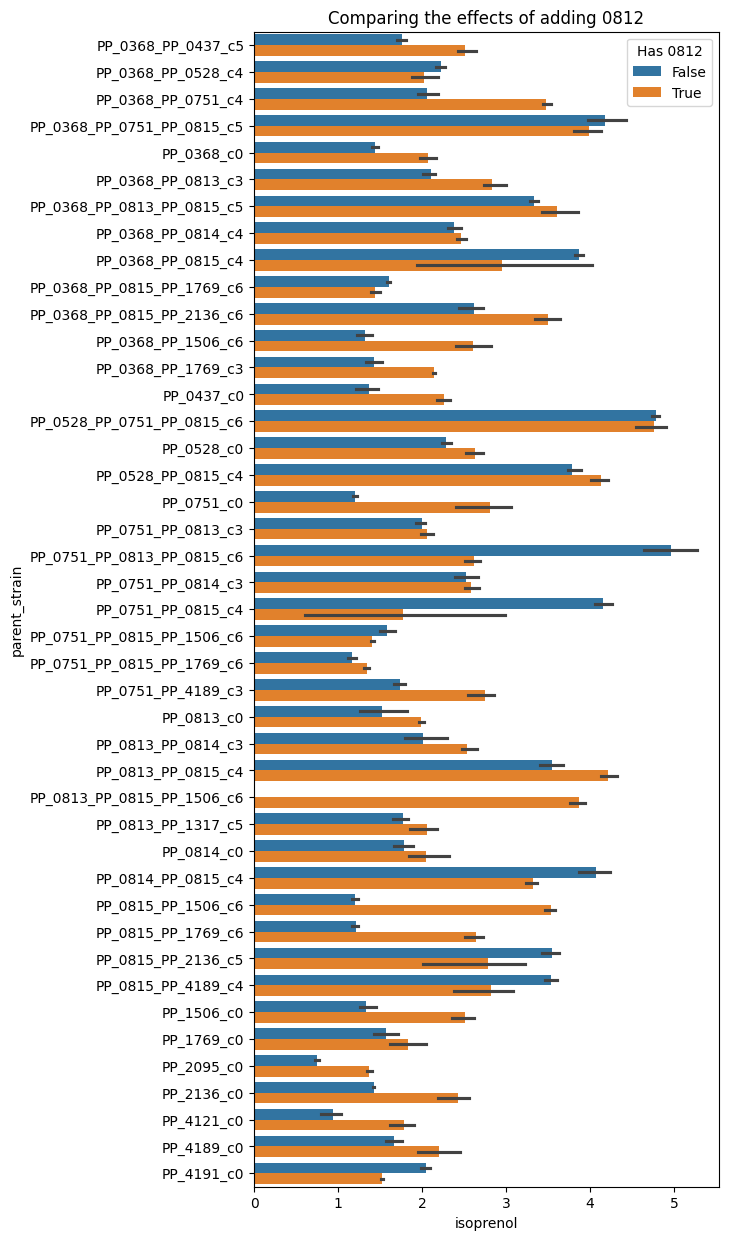

In [18]:
fig, ax = plt.subplots(figsize = (6, 15))
sns.barplot(data = parent_child_df, y = 'parent_strain', x = 'isoprenol', hue = hue_column)
ax.set_title(ax_title)

In [19]:
delta_df = pd.DataFrame.from_dict({'parent_strain':parent_child_df['parent_strain'].unique()})
delta_df['parent_mean'] = delta_df['parent_strain'].apply(lambda x:
                                                              parent_child_df.loc[
                                                                  (parent_child_df['parent_strain'] == x) &
                                                                  (parent_child_df['is_parent']),
                                                                  'isoprenol'
                                                              ].mean()
                                                         )
delta_df['child_mean'] = delta_df['parent_strain'].apply(lambda x:
                                                              parent_child_df.loc[
                                                                  (parent_child_df['parent_strain'] == x) &
                                                                  (~parent_child_df['is_parent']),
                                                                  'isoprenol'
                                                              ].mean()
                                                         )
delta_df['target_diff'] = delta_df['child_mean'] - delta_df['parent_mean']
delta_df = delta_df.sort_values('target_diff')

Text(0.5, 1.0, 'Comparing the effects of adding 0812')

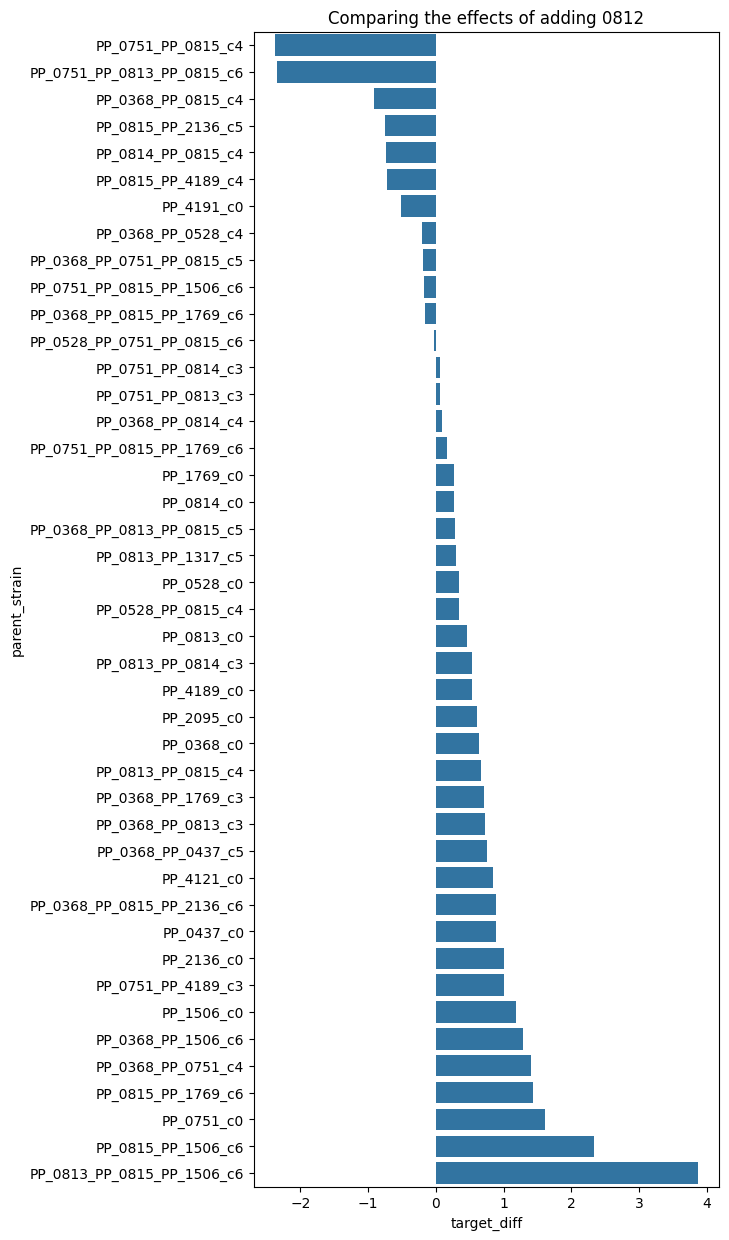

In [20]:
fig, ax = plt.subplots(figsize = (6, 15))
sns.barplot(data = delta_df, y = 'parent_strain', x = 'target_diff')
ax.set_title(ax_title)

## Scale up previous analysis to show all targets

### Import filter dataframe

In [21]:
filter_df['line_name_cycle']

0                       Control_c0
1                       Control_c0
2                       Control_c0
3                       Control_c0
4                       Control_c0
                   ...            
1501    PP_0813_PP_0815_PP_1506_c6
1502    PP_0813_PP_0815_PP_1506_c6
1503            PP_1506_PP_4120_c6
1504            PP_1506_PP_4120_c6
1505            PP_1506_PP_4120_c6
Name: line_name_cycle, Length: 1506, dtype: object

In [22]:
c3_strains = df2.loc[df2['cycle'] >=3, 'line_name_cycle'].values
unique_list = []
for s in c3_strains:
    if 'PP' in s:
        non_cycle_string = s[:-2]
        if '_P4' in non_cycle_string:
            non_cycle_string = non_cycle_string[:-3]
        grna = non_cycle_string.split('PP_')[1:]
        
        grna = [g[:-1] for g in grna]
        unique_list.extend(grna)
unique_list = list(set(unique_list))
unique_list.sort()
unique_list = [f'PP_{n}' for n in unique_list]

In [23]:
target_pair_list_dict = {}
for target in unique_list:
    print('#'*20)
    print(f'Target: {target}')
    print('#'*20)
    target_number = target[3:]
    df2['has_target'] = df2['line_name_rep_cycle'].apply(lambda x: target in x)
    strains_with_target =  df2.loc[df2['has_target'], 'line_name_cycle'].unique()
    parent_child_list = []
    for s in strains_with_target:
        # print(f'strain: {s}')
        non_cycle_string = s[:-2]
        if '_P4' in non_cycle_string:
            non_cycle_string = non_cycle_string[:-3]
        #get individual genes as strings
        grna = non_cycle_string.split('PP_')[1:]
        # print(f'1) grna: {grna}')
        #remove the underscore
        grna = [g[:-1] for g in grna]
        grna.remove(target_number)
        # print(f'2) grna: {grna}')
        # print(f'len: {len(grna)}')
    
        #check to see if there's more than one gRNA (i.e. exclude the PP_0815 only strain)
        if len(grna)>0:
            #Look for any other strains with that collection of grna
            parent_strain_idx = df2['line_name_rep_cycle'].str.contains(grna[0])
            # print(sum(parent_strain_idx))
            for i in range(1,len(grna)):
                parent_strain_idx = parent_strain_idx & df2['line_name_rep_cycle'].str.contains(grna[i])
                # print(sum(parent_strain_idx))
            parent_strain_idx = parent_strain_idx & (df2['number_of_grna'] == len(grna)) & (df2['cycle'] != 2)
            # print(sum(parent_strain_idx))
            # print(len(df[parent_strain_idx]))
            
        
            if len(df2[parent_strain_idx])>0:
                # print(f'~~~~~~~~~~~~~~~~~~~~~~~~~ strain: {s} Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~')
                strain_list = [s]
                strain_list.extend([strain_name for strain_name in df2.loc[parent_strain_idx, 'line_name_cycle'].unique()])
                parent_child_list.append(strain_list)
        
    pair_list = [l for l in parent_child_list if len(l) == 2]  
    target_pair_list_dict[target] = pair_list

pass_fail_df = pd.DataFrame.from_dict(
    {
        'target': unique_list,
        'n_pass': n_pass_list,
        'n_fail': n_fail_list
    }
)

####################
Target: PP_0368
####################
####################
Target: PP_0437
####################
####################
Target: PP_0528
####################
####################
Target: PP_0751
####################
####################
Target: PP_0812
####################
####################
Target: PP_0813
####################
####################
Target: PP_0814
####################
####################
Target: PP_0815
####################
####################
Target: PP_1317
####################
####################
Target: PP_1506
####################
####################
Target: PP_1769
####################
####################
Target: PP_2136
####################
####################
Target: PP_4120
####################
####################
Target: PP_4189
####################
####################
Target: PP_4191
####################
####################
Target: PP_4192
####################


NameError: name 'n_pass_list' is not defined

In [ ]:
full_df_list = []
delta_df_list = []
for target in unique_list:
    print(target)
    df_list = []
    pair_list = target_pair_list_dict[target]
    print(len(pair_list))
    if len(pair_list) == 0:
        continue
    for l in pair_list:
        parent_strain = l[1]
        child_strain = l[0]
        parent_df = df2.loc[
            df2['line_name_cycle'] == parent_strain,
            ['line_name_rep_cycle', 'line_name_cycle', 'isoprenol']
        ].copy()
        parent_df['is_parent'] = True
        parent_df['parent_strain'] = parent_strain
        child_df = df2.loc[
            df2['line_name_cycle'] == child_strain,
            ['line_name_rep_cycle', 'line_name_cycle', 'isoprenol']
        ].copy()
        child_df['is_parent'] = False
        child_df['parent_strain'] = parent_strain
        df_list.extend([parent_df, child_df])
    
    parent_child_df = pd.concat(df_list)  
    parent_child_df['target'] = target

    full_df_list.append(parent_child_df)

    
    delta_df = pd.DataFrame.from_dict({'parent_strain':parent_child_df['parent_strain'].unique()})
    delta_df['parent_mean'] = delta_df['parent_strain'].apply(lambda x:
                                                                  parent_child_df.loc[
                                                                      (parent_child_df['parent_strain'] == x) &
                                                                      (parent_child_df['is_parent']),
                                                                      'isoprenol'
                                                                  ].mean()
                                                             )
    delta_df['child_mean'] = delta_df['parent_strain'].apply(lambda x:
                                                                  parent_child_df.loc[
                                                                      (parent_child_df['parent_strain'] == x) &
                                                                      (~parent_child_df['is_parent']),
                                                                      'isoprenol'
                                                                  ].mean()
                                                             )
    delta_df['target_diff'] = delta_df['child_mean'] - delta_df['parent_mean']
    delta_df = delta_df.sort_values('target_diff')
    delta_df['target'] = target
    delta_df_list.append(delta_df)
full_delta_df = pd.concat(delta_df_list)
full_df = pd.concat(full_df_list)


In [ ]:
order_df = full_delta_df.loc[:, ['target_diff', 'target']].groupby('target').mean()
order_df = order_df.sort_values(by = 'target_diff', ascending = False)
plot_order = order_df.index

In [ ]:
fig, ax = plt.subplots(figsize = (6, 10))
sns.boxplot(full_delta_df, x = 'target_diff', y = 'target', order = plot_order)
ax.axvline(0, c = 'k', linestyle = '--')

In [ ]:
fig, ax = plt.subplots(figsize = (6, 10))
sns.stripplot(full_delta_df, x = 'target_diff', y = 'target', order = plot_order, alpha = 0.5)

## Redo above w/ filtered data

In [ ]:
df2f = df2.loc[df2['pass_filter']].copy(deep = True).reset_index(drop = True)

In [ ]:
target_pair_list_dict = {}
for target in unique_list:
    # print('#'*20)
    # print(f'Target: {target}')
    # print('#'*20)
    target_number = target[3:]
    df2f['has_target'] = df2f['line_name_rep_cycle'].apply(lambda x: target in x)
    strains_with_target =  df2f.loc[df2f['has_target'], 'line_name_cycle'].unique()
    parent_child_list = []
    for s in strains_with_target:
        # print(f'strain: {s}')
        non_cycle_string = s[:-2]
        if '_P4' in non_cycle_string:
            non_cycle_string = non_cycle_string[:-3]
        #get individual genes as strings
        grna = non_cycle_string.split('PP_')[1:]
        # print(f'1) grna: {grna}')
        #remove the underscore
        grna = [g[:-1] for g in grna]
        grna.remove(target_number)
        # print(f'2) grna: {grna}')
        # print(f'len: {len(grna)}')
    
        #check to see if there's more than one gRNA (i.e. exclude the PP_0815 only strain)
        if len(grna)>0:
            #Look for any other strains with that collection of grna
            parent_strain_idx = df2f['line_name_rep_cycle'].str.contains(grna[0])
            # print(sum(parent_strain_idx))
            for i in range(1,len(grna)):
                parent_strain_idx = parent_strain_idx & df2f['line_name_rep_cycle'].str.contains(grna[i])
                # print(sum(parent_strain_idx))
            parent_strain_idx = parent_strain_idx & (df2f['number_of_grna'] == len(grna)) & (df2f['cycle'] != 2)
            # print(sum(parent_strain_idx))
            # print(len(df[parent_strain_idx]))
            
        
            if len(df2f[parent_strain_idx])>0:
                # print(f'~~~~~~~~~~~~~~~~~~~~~~~~~ strain: {s} Has parent ~~~~~~~~~~~~~~~~~~~~~~~~~')
                strain_list = [s]
                strain_list.extend([strain_name for strain_name in df2f.loc[parent_strain_idx, 'line_name_cycle'].unique()])
                parent_child_list.append(strain_list)
        
    pair_list = [l for l in parent_child_list if len(l) == 2]  
    print(f'Target: {target} - len(pair_list): {len(pair_list)}')

    target_pair_list_dict[target] = pair_list
    

In [ ]:
full_df_list = []
delta_df_list = []
for target in unique_list:
    print(target)
    df_list = []
    pair_list = target_pair_list_dict[target]
    print(len(pair_list))
    if len(pair_list) == 0:
        continue
    for l in pair_list:
        parent_strain = l[1]
        child_strain = l[0]
        parent_df = df2f.loc[
            df2f['line_name_cycle'] == parent_strain,
            ['line_name_rep_cycle', 'line_name_cycle', 'isoprenol']
        ].copy()
        parent_df['is_parent'] = True
        parent_df['parent_strain'] = parent_strain
        child_df = df2f.loc[
            df2f['line_name_cycle'] == child_strain,
            ['line_name_rep_cycle', 'line_name_cycle', 'isoprenol']
        ].copy()
        child_df['is_parent'] = False
        child_df['parent_strain'] = parent_strain
        df_list.extend([parent_df, child_df])
    
    parent_child_df = pd.concat(df_list)  
    parent_child_df['target'] = target

    full_df_list.append(parent_child_df)

    
    delta_df = pd.DataFrame.from_dict({'parent_strain':parent_child_df['parent_strain'].unique()})
    delta_df['parent_mean'] = delta_df['parent_strain'].apply(lambda x:
                                                                  parent_child_df.loc[
                                                                      (parent_child_df['parent_strain'] == x) &
                                                                      (parent_child_df['is_parent']),
                                                                      'isoprenol'
                                                                  ].mean()
                                                             )
    delta_df['child_mean'] = delta_df['parent_strain'].apply(lambda x:
                                                                  parent_child_df.loc[
                                                                      (parent_child_df['parent_strain'] == x) &
                                                                      (~parent_child_df['is_parent']),
                                                                      'isoprenol'
                                                                  ].mean()
                                                             )
    delta_df['target_diff'] = delta_df['child_mean'] - delta_df['parent_mean']
    delta_df = delta_df.sort_values('target_diff')
    delta_df['target'] = target
    delta_df_list.append(delta_df)

full_delta_df = pd.concat(delta_df_list)
full_df = pd.concat(full_df_list)


In [ ]:
full_delta_df['N_target'] = full_delta_df['target'].apply(lambda x: sum(full_delta_df['target'] == x))

In [ ]:
full_delta_df['plot_name'] = full_delta_df.apply(
    lambda x: f"{x['target']} - N = {x['N_target']} pairs",
    axis = 1
)

In [ ]:
order_df = full_delta_df.loc[:, ['target_diff', 'plot_name']].groupby('plot_name').mean()
order_df = order_df.sort_values(by = 'target_diff', ascending = False)
plot_order = order_df.index

In [ ]:
fig, ax = plt.subplots(figsize = (6, 10))
sns.boxplot(full_delta_df, x = 'target_diff', y = 'plot_name', order = plot_order)
ax.axvline(0, c = 'k', linestyle = '--')
ax.set_title('Parent-child analysis with FILTERED data')

### Get the pass/fail numbers for each target

In [ ]:
filter_df2 = filter_df.copy(deep = True)
n_pass_list = []
n_fail_list = []
n_missing_list = []
target_cols = [f'target_{i}' for i in [1, 2, 3, 4]]
for target in unique_list:
    filter_df2['has_target'] = [target in line_name for line_name in filter_df2['Line Name']]
    n_pass = 0
    n_fail = 0
    n_missing = 0
    for idx, srs in filter_df2[filter_df2['has_target']].iterrows():
        matching_target_column_list = [c for c in target_cols if srs[c] == target]
        assert len(matching_target_column_list) == 1, f'ERROR: none of {srs[target_cols]} match target: {target}'
        threshold_column = f'{matching_target_column_list[0]}_belowthresh'
        value_column = f'{matching_target_column_list[0]}_value'
        if np.isnan(srs[value_column]):
            n_missing +=1
        else:
            if srs[threshold_column]:
                n_pass+=1
            else:
                n_fail+=1
    n_pass_list.append(n_pass)
    n_fail_list.append(n_fail)
    n_missing_list.append(n_missing)
    # if target == 'PP_0815':
    #     break
    
pass_fail_df = pd.DataFrame.from_dict(
    {
        'target': unique_list,
        'n_pass': n_pass_list,
        'n_fail': n_fail_list,
        'n_missing': n_missing_list,
    }
)
pass_fail_df['n_total'] = pass_fail_df['n_pass'] + pass_fail_df['n_fail'] + pass_fail_df['n_missing']
pass_fail_df['pct_fail']= 100*pass_fail_df['n_fail']/pass_fail_df['n_total']

    

In [ ]:
pct_fail_df = pass_fail_df[['target', 'pct_fail']].melt(id_vars = 'target')
pass_fail_df_melt = pass_fail_df[['target', 'n_pass', 'n_fail', 'n_missing']].melt(id_vars = 'target')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (6, 6))
sns.boxplot(full_delta_df, x = 'target_diff', y = 'plot_name', order = plot_order, ax = ax[0])
ax[0].axvline(0, c = 'k', linestyle = '--')
ax[0].set_title('Parent-child analysis with FILTERED data')

sns.barplot(pass_fail_df_melt, x = 'value', y = 'target',hue = 'variable', order = [po[:7] for po in plot_order], ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('Number of strains\nwith unsuccessful\ntarget downregulation')
ax[1].set_yticklabels([])
fig.tight_layout()

Format dataframes for final plot

In [ ]:
full_delta_df['Titer w/ target - Titer w/o target'] = full_delta_df['target_diff']

In [ ]:
formatted_variable_dict = {
    'n_pass': 'Pass',
    'n_fail': 'Fail',
    'n_missing': 'Below LOD'
}
pass_fail_df_melt['Incidence in\nCRISPRi arrays'] = pass_fail_df_melt['variable'].apply(lambda x: formatted_variable_dict[x])



In [ ]:
355.9312/72
# 279.4983/72

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (5, 3.8))
sns.boxplot(full_delta_df, x = 'Titer w/ target - Titer w/o target', y = 'plot_name', order = plot_order, ax = ax[0])
ax[0].axvline(0, c = 'k', linestyle = '--')
# ax[0].set_title('Parent-child analysis with FILTERED data')
ax[0].set_ylabel('')

sns.barplot(pass_fail_df_melt, x = 'value', y = 'target',hue = 'Incidence in\nCRISPRi arrays', order = [po[:7] for po in plot_order], ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('Incidence in\nCRISPRi arrays')
# handles, labels = ax[1].get_legend_handles_labels()
# ax[1].legend(handles=handles[:], labels=labels[:], loc = 'lower right')
# ax[1].set_yticklabels([])
ax[1].legend_.set_title(None)
sns.move_legend(ax[1], 'lower right')

ax[0].set_xlim([-5, 5])
# ax[1].set_xlim([0, 300])
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (5, 3.8))
sns.boxplot(full_delta_df, x = 'Titer w/ target - Titer w/o target', y = 'plot_name', order = plot_order, ax = ax[0])
ax[0].axvline(0, c = 'k', linestyle = '--')
# ax[0].set_title('Parent-child analysis with FILTERED data')
ax[0].set_ylabel('')

sns.barplot(pass_fail_df_melt, x = 'value', y = 'target',hue = 'Incidence in\nCRISPRi arrays', order = [po[:7] for po in plot_order], ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('Incidence in\nCRISPRi arrays')
# handles, labels = ax[1].get_legend_handles_labels()
# ax[1].legend(handles=handles[:], labels=labels[:], loc = 'lower right')
# ax[1].set_yticklabels([])
ax[1].legend_.set_title(None)
sns.move_legend(ax[1], 'lower right')

ax[0].set_xlim([-5, 5])
# ax[1].set_xlim([0, 300])
fig.tight_layout()
fig.savefig('./sample_parent_child_analysis.pdf')